# Medidas de Tendência Central

É importante deixar claro que a media é afetada pelos outliers, enquanto a mediana não. Isso acontece pois ao calcular o valor da media, todos os valores entram no somatorio, inclusive os outliers, puxando o valor da media como um todo pra cima. Enquanto a mediana apenas separa os dados, fazendo com que os outliers muito isolados nem entrem no calculo

É importante saber quando usar cada umas das duas metricas!

## Media

Resultado da soma dos valores dividido pelo numero de elementos.


In [1]:
import statistics as s

lista_1 = [10, 20, 10, 30, 15, 25, 100]
s.mean(lista_1)

30

## Mediana

Meio da distribuição, é o valor que divide seu conjunto de valores **ordenados** em duas partes. Caso seja um numero par de valores, vão ter dois numeros que estarão dividindo, neste caso, tiraremos a media deles

In [2]:
lista_2 = [34,6,34,4,3,2,62,6]
s.median(lista_2)

6.0

## Moda

Valor mais frequente no seu conjunto de dados, caso tenha mais de um valor com frequencia igual, vai retornar o primeiro valor encontrado

In [3]:
lista_3 = [1,1,34,3,2,3,3,3,6,5,4,3]
s.mode(lista_3)

3

# Medidas de dispersão

As medidas de tendencia central são aquelas que buscam os pontos centrais dos conjutnos de dados, mas não conseguem analisar como eles estão dispersos, como eles se espalham/distribuem

## Variancia de Desvio padrão

Vão investigar qual a distancia de todos os pontos para a media


Variancia é a (soma dos desvios elevados ao quadrado) / Quantidade de valores

In [4]:
# Para essa lista o somatorio dos quadrados é 10
lista = [1, 2, 3, 4, 5]
print(s.mean(lista), s.pvariance(lista)) # 10 / 5

3 2


O desvio padrão é a raiz da variancia

In [5]:
s.pstdev(lista)

1.4142135623730951

Quando fazemos com P no começo, ele está calculando a variancia e desvio padrão da população, o que não é tao utilizado, o mais utilizado é calcular as metricas de uma amostra, Dividindo tudo por N-1 ao inves de dividir por N

In [6]:
lista = [1, 2, 3, 4, 5]
print(s.mean(lista), s.variance(lista)) # 10 / 4

3 2.5


# Quantil, Quartil e percentil

Vamos ver varios techos da distribuição dos nossos dados, ao inves de um numero geral como foi visto anterioemente, olharemos sobre o ponto de vista de varios trechos dos daods

**Percentil** é o percentual do seu numero em uma lista ordenada, por exemplo, a mediana de uma distribuião tambem pode ser chamada de 50° percentil(p50) uma vez que 50% dos valores estão abaixo delas

**Quartil** é um conceito bastante parecido, mas ele divide os dados em 3 partes, 1°, 2° e 3° quartil
- O 1° quartil representa o valor que deixa 25% dos valores do conjunto abaixo dele
- O 2° quartil é o valor que deixa 50% dos dados abaixo dele
- O 3° quartil é o valor que deixa 75% dos dados abaixo dele

In [7]:
import numpy as np
import matplotlib.pyplot as plt

A = [0,1,2,3,4,5,6,7,8,9,10]*1000# criando uma amostra de dados(500 valores que vão de 0-100)
B = [90,95,100]*200
ListaFinal = A+B


In [8]:
np.mean(ListaFinal), np.median(ListaFinal)

(9.655172413793103, 5.0)

Podemos ver um exemplo claro de como os outliers afetam mais a media do que a mediana, mostrando que pra esse caso, a mediana teve um comportamente que resumiu melhor os dados

QUando temos uma media muito diferente da mediana pode dizer que temos fortes outliers impactando na analise de dados

In [9]:
# Vendo os percentils
np.percentile(ListaFinal, 10), \
np.percentile(ListaFinal, 25), \
np.percentile(ListaFinal, 50),\
np.percentile(ListaFinal, 75),\
np.percentile(ListaFinal, 90), \
np.percentile(ListaFinal, 95)

(1.0, 2.0, 5.0, 8.0, 10.0, 90.0)

Percebemos que quase todos os percentis estão entre0-10, demonstrando que a maioria dos valores estão, em sua maioria, nessa faixa. Porem, quando olhamos parao topo, temos um valor que é muito maior que os demais, isso demonstra que nossos dados são assimetricos e que temos alguns outliers

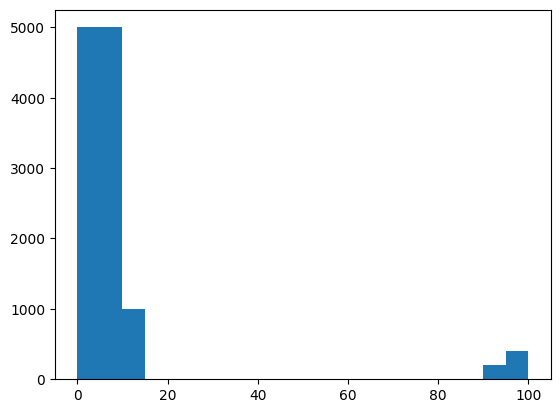

In [10]:
_ = plt.hist(ListaFinal, bins=20)

In [11]:
# Quartil
np.quantile(ListaFinal, .25), \
np.quantile(ListaFinal, .5), \
np.quantile(ListaFinal, .75)

(2.0, 5.0, 8.0)

DESAFIO:
Imagine que eu te diga que o salario por hora de meus funcionarios possuem os seguintes percentis:
- p25 = 50
- p50 = 100
- p75 = 150
- p99 = 190

Poroutro lado, as idades deles possuem os seguites percentis:
- p25 = 20
- p50 = 25
- p75 = 28
- p99 = 70

Como voce imaginaria que a distribuição salarial e etaria se pareceria? Discorra sobre o assunto com seus colegas. Tentem imaginar quais os possiveis histogramas para cada um dos conjutos de dados

R: Apesar do salario por hora seguir uma distribuição aparentemente bem balanceada, conseguimos notar o caso contrario quando se trata das idades, em que grande parte dos funcionarios estao entre 20-28 anos, mas existem outliers absurdos que fazem o percentil pular pra um numero muito maior

# BoxPlot

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Universidade de dados/Semana 3/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


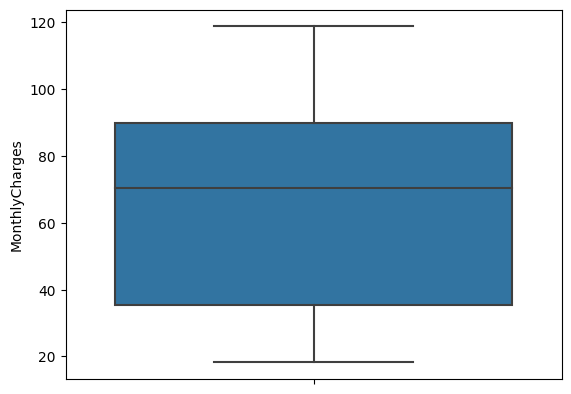

In [14]:
# Plotar boxplot
import seaborn as sns

_ = sns.boxplot(y = 'MonthlyCharges', data=df) # Y = deitado, X = em pe

Ele está mostrando a distribuição dos dados.
- As linhas horizontais mais externas mostram o **minimo e o maximo**
- A caixa mostra os valores a partir do **25° percentil ate o 75° percentil**(1 quartil ate o 3 quartil)
- A linha preta dentro da caixa mostra a **mediana**

Sabendo dessas informações, podemos inferir que
- 25% dos clientes pagam menos que algo em torno de 36-38 reais
- 75% dos clientes pagam menos que algo em torno de 84-86 reais
- A mediana da cobrança está em torno de 70 reais
- A menor e maior taxa de cobrança tem uma **distancia de mais ou menos 100 reais**

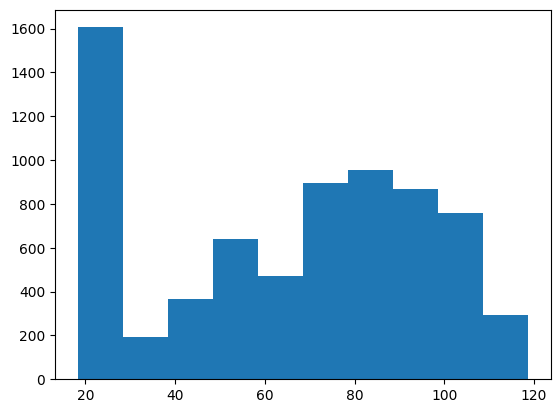

In [15]:
# vendo a mediana com o histograma
_ = plt.hist(df.MonthlyCharges)

**OBS IMPORTANTE**: é errado falar que, nesse caso, a maioria dos clientes estão em torno de 20. Esse gráfico da essa impressão pois tem uma grande linha vertical em 20, isso quer dizer que temos muitos clientes com valores EXATAMENTE IGUAIS a 20, mas a maioria dos clientes estão espalhados por valores entre 65-110. O certo seria falar que a FAIXA DE VALOR com mais clientes é 20, mas a maioria dos clientes não estão em 20!

Sempre bom olhar não so pra altura do histograma, mas sim para a area que ele cobre

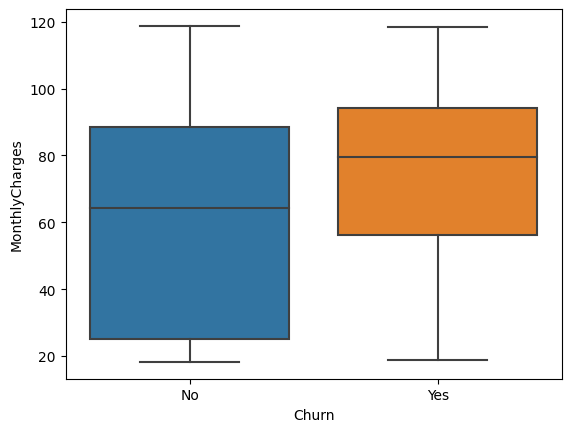

In [16]:
# Vamos olhar a distribuião entre a cobrança de quem é churn e de quem não é churn
_ = sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

Quem da chrun tem, via de regra, uma cobrança mais alta

O 25 percentil de quem da churn é muito maior do que quem não da, então os 25 valores mais baixos de quem da churn são bem maiores dos valores de quem nao da

In [17]:
# Tambem podemos ver a distribuição a partir do describe
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Essa coluna é mais ou menos assimetrica, podemos observar que do primeiro para o segundo quartil tem uma diferença grande, o numero dobrou.

In [18]:
# Olhando apensar para a media, percentis e desvio padrao, vTente inferir como serie o grafico de histogrtama e boxpltot TotalCharges(pensar como os dados tao distribuidos)
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype('float32')
descricao_total_charges = df['TotalCharges'].describe()

print(descricao_total_charges)

count    7043.000000
mean     2279.734375
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64


pontos a destacar:
- A media é bem maior que a mediana, possivelmente tem muitos outliers que puxam a media pra cima
- O histograma provavelmente vai ter a maioria de seus valores entre uma facha de 400-3800, mas vao ter alguns valores outliers pra cima e pra baixo

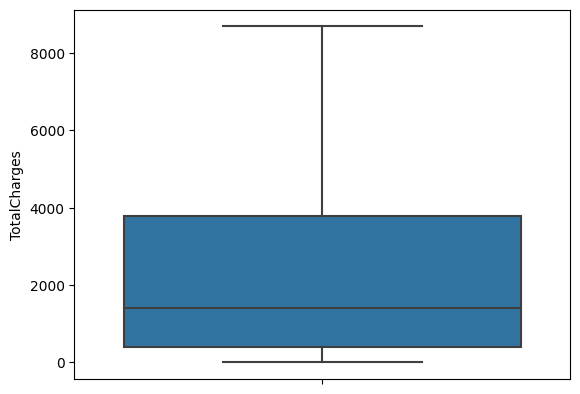

In [19]:
# Plotando o boxplot
_ = sns.boxplot(y=df.TotalCharges)

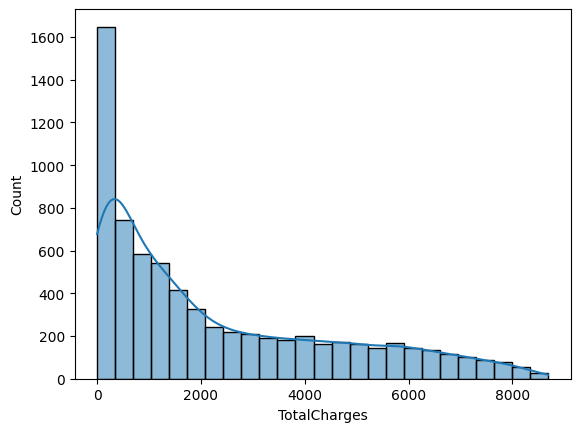

In [20]:
_ = sns.histplot(x=df.TotalCharges, kde=True)

Fazendo a analise num caminho inverso

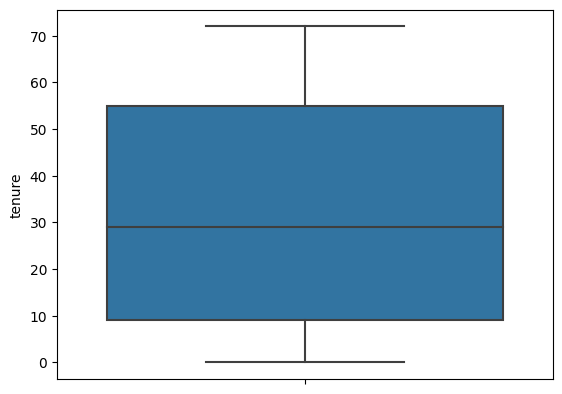

In [21]:
# Tambem vamos fazer o inverso: A partir do boxplot de tenure, voce consegue saber mais ou menos o valor da media, mediana, desvio padrao e etc?
_ = sns.boxplot(y=df.tenure)

- A mediana está bem proxima do meio do boxplot, provavelmente o numero de outliers pra cima não é tao grande, apesar de ser maior que os pra baixo, entao provavlmente a media vai ser um pouco maior que a mediana, o desvio padrao será mediano por causa desses outliers


In [22]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

# Desafio final

Desafio final: 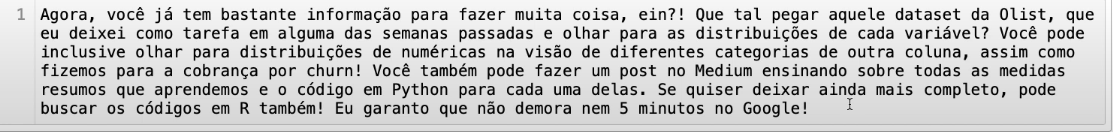

## Df pedidos

In [23]:
pedidos = pd.read_csv('/content/drive/MyDrive/Universidade de dados/Semana 2/Dataset semana 2/olist_order_items_dataset.csv')
pedidos.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Boxplot do price

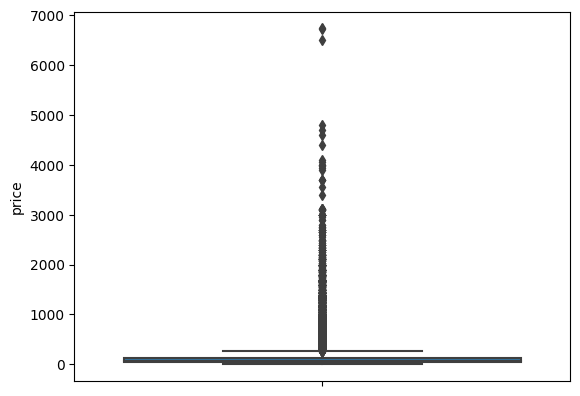

In [24]:
_ = sns.boxplot(y=pedidos.price)

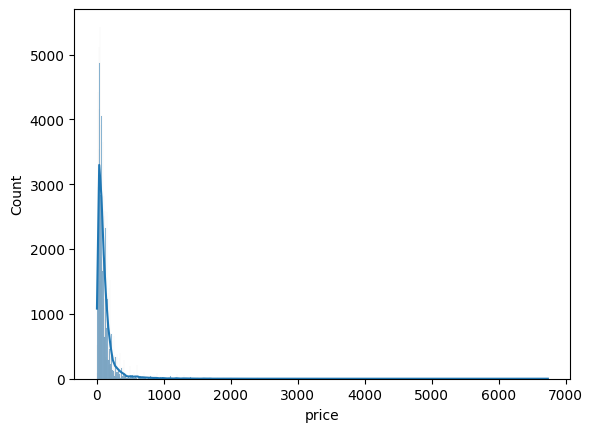

In [25]:
_ = sns.histplot(x=pedidos.price, kde=True)

Apear de a grande maioria dos produtos ter um preço entre 0-400, Percebmos uma presença de grandes de outliers, provavelmente a media vai ter um valor absurdamente maior que a mediana e teremos uma giganteasca diferença entre o maximo e minimo

In [26]:
pedidos['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

Analisando a distribuição de valores de freight_value

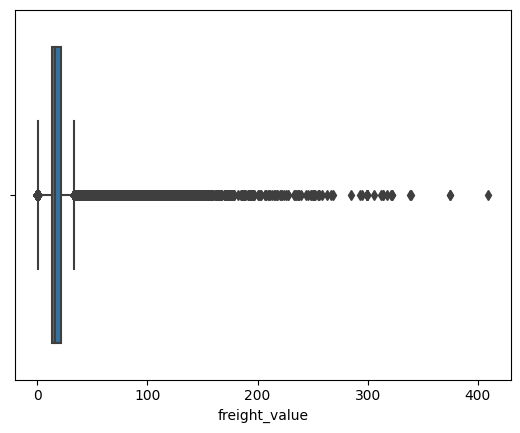

In [33]:
_ = sns.boxplot(x = pedidos.freight_value)

Mesa logica do preço, a grande maioria dos valores(+75%) estao abaixo de 30~40, enquanto temos outliers que vão ate proximidades de 450, ou seja, outliers fortissimos. Possivelmente a media sera puxada para cima por conta disso

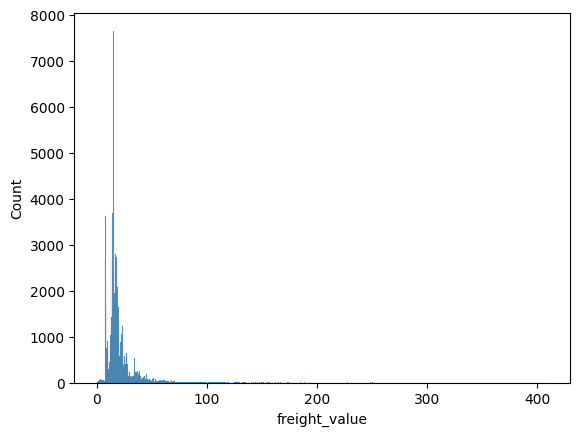

In [36]:
_ = sns.histplot(x = pedidos.freight_value)

Como foi previsto pelo boxplot, a grande maioria dos valores ficam abaixo de 30~4, mas temos outliers de valores muoto grandes em comparação a maior parte dos dados

In [37]:
pedidos['freight_value'].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

Apesar de nao ter sido um valor tao distoante entre a media e mediana, ao olhar para o valor maximo fica claro a existencia desses fortes outliers
